# Dimension reduction and Clustering

In [88]:
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

## PCA: Data set swiss roll

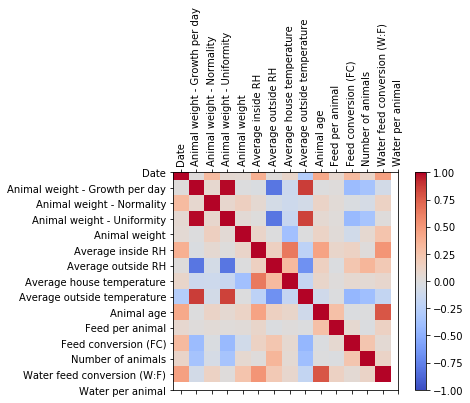

In [89]:
data=pd.read_excel("./data/airport_line_airport_line_house_1_fontys_management_info_20171101_20191127_1574931146.xlsx", skiprows = range(0, 1))
# fixedData = data['data.feed_per_animal']
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

In [90]:
highCorr = corr[corr>0]
print(highCorr[highCorr<1].stack())
highCorr[highCorr<1].stack().to_csv("./data/correlation.csv")
highCorr[highCorr<1].stack().to_string("./data/correlation.txt")

Animal weight - Growth per day  Animal weight - Normality         0.013413
                                Animal weight - Uniformity        0.304814
                                Animal weight                     0.054905
                                Average inside RH                 0.050124
                                Average outside RH                0.375600
                                Average house temperature         0.012139
                                Average outside temperature       0.097292
                                Feed per animal                   0.420511
                                Feed conversion (FC)              0.075209
                                Number of animals                 0.316776
                                Water feed conversion (W:F)       0.105918
                                Water per animal                  0.465348
Animal weight - Normality       Animal weight - Growth per day    0.013413
                         

In [91]:
# output = open("./data/correlation.txt","w+")
# output.write(highCorr[highCorr<1].stack())
# output.close()



In [92]:
# corr.stack().to_csv("./data/correlation.csv",encoding='utf-8-sig')